### Model Evaluation

This is a demonstration of evaluating a model.

#### Step 1

Load the required dependencies.


In [14]:
# Import frameworks
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('../style_Matplotlib_charts.mplstyle')
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import pickle

#### Step 9. Multiple Variable Linear Regression

Loading the multi-variable linear regression model for testing

In [15]:
filename = 'LinearRegression_Models/A/A_MV_model_v9.sav'
model_C = pickle.load(open(filename, 'rb'))

Opening and parsing the test data CSV file, with the specific input features collected

In [16]:
mx_col = ['num_bed', 'num_bath', 'property_size', 'value_score', 'tot_rooms', 'suburb_median_income', 'suburb_lat', 'suburb_lng', 'km_from_cbd', 'ds_float', 'num_parking' ]
testing_data = pd.read_csv('A_testing_data/A_testing_data_new_2.csv')
mx_test = np.array(testing_data[mx_col])
my_test = np.array(testing_data['Target'])

#### Step 10

- Individually plotting test data features, targets and predictions from the model, on a graph for each input feature, with the purpose of visually evaluating the accuracy of the model

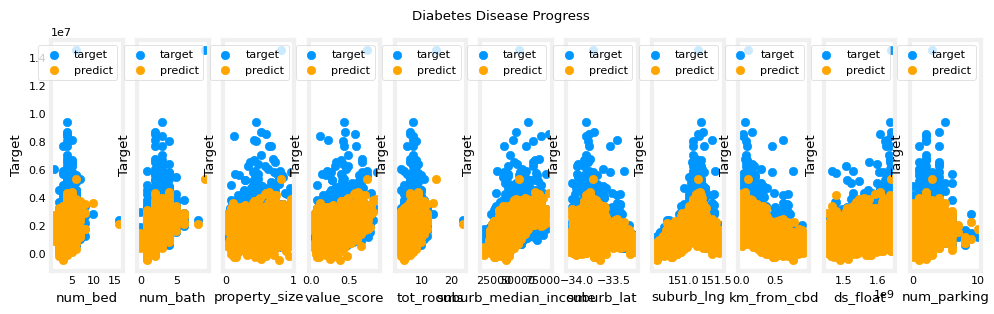

In [17]:
my_pred = model_C.predict(mx_test)

# plot predictions and targets vs original features    
fig,ax=plt.subplots(1,len(mx_col),figsize=(12,3),sharey=True)
for i in range(len(ax)):
    ax[i].scatter(mx_test[:,i],my_test, label = 'target')
    ax[i].set_xlabel(mx_col[i])
    ax[i].scatter(mx_test[:,i],my_pred,color="orange", label = 'predict')
    ax[i].set_ylabel("Target"); ax[i].legend();
fig.suptitle("Diabetes Disease Progress")
plt.show()

In [18]:
test_score = model_C.score(mx_test, my_test)
print(f'Training data score: {test_score}')

Training data score: 0.5704222365889426


- Thus including almost all features contributes to a far higher test score when using multivariable linear regression. As it is 11% higher than the previous model

The other model types such as linear regression and polynomial regression did not produce similar scores to that of MVLR

#### Step 11

- You can do predictions to get a feel for the model

In [11]:
print(model_C.predict([[3,2,4.87804878e-02, 4.60534580e-02, 5.00000000e+00, 5.00000000e+04, -3.40183000e+01, 1.51124650e+02, 5.75275398e-02, 1.69611840e+09, 2.00000000e+00]]))

[2173306.84189531]


#### Step 12 

- Manually calculating the loss and cost of the model using testing data

In [12]:
data = {col: mx_test[:, i] for i, col in enumerate(mx_col)}
data['Target'] = my_test
data['Predicted result'] = model_C.predict(mx_test)
data['Cost'] = my_test - model_C.predict(mx_test).round(2)

table = pd.DataFrame(data)
print(table)

      num_bed  num_bath  property_size  value_score  tot_rooms  \
0         3.0       1.0       0.317073     0.252175        4.0   
1         4.0       2.0       0.558537     0.456788        6.0   
2         4.0       1.0       0.494309     0.362359        5.0   
3         3.0       1.0       0.646341     0.351823        4.0   
4         4.0       2.0       0.252033     0.163171        6.0   
...       ...       ...            ...          ...        ...   
2329      4.0       2.0       0.247154     0.211081        6.0   
2330      3.0       1.0       0.520325     0.361874        4.0   
2331      4.0       2.0       0.096748     0.091653        6.0   
2332      4.0       3.0       0.419512     0.346635        7.0   
2333      5.0       2.0       0.568293     0.443210        7.0   

      suburb_median_income  suburb_lat  suburb_lng  km_from_cbd      ds_float  \
0                  26208.0   -33.83592   151.00745     0.229009  1.608422e+09   
1                  37700.0   -33.99061   151.

Shows the x axis intercepts, which are the values when inputs are 0 and the coefficients which is the influence a feature has on the prediction

In [13]:
print(f'X Axis intercept: {model_C.intercept_}')
print(f'Coefficient: {model_C.coef_}')

X Axis intercept: -227097296.77196437
Coefficient: [-6.11028282e+04  1.50809706e+05 -2.33964167e+06  4.72483757e+06
  8.97068349e+04  3.33784097e+01 -2.71433995e+05  1.39962674e+06
 -3.05847946e+05  3.65554678e-03 -1.54878739e+03]


- The differences in coefficients illuminate how the different input features  influence the model, features like value_score have a high coefficient meaning they have a large influence on the model prediction